<a href="https://colab.research.google.com/github/YukiAoki-GU/-Mathematical_analysis_by_Python/blob/main/AI%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%9F%E3%83%AA%E3%82%A2%E3%83%AB%E3%83%AF%E3%83%BC%E3%83%AB%E3%83%89%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E8%A9%95%E4%BE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIを使ったリアルワールドデータ(RWD)の評価



## **RWDとは？**

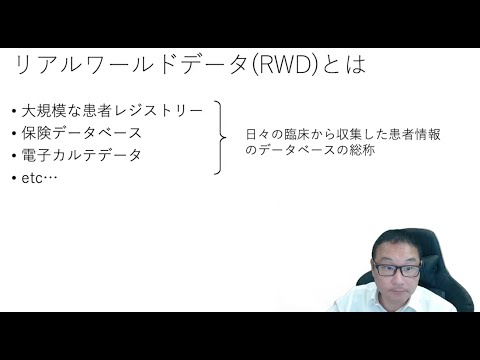

In [ ]:
#こちらの動画を見てください
from IPython.display import YouTubeVideo
YouTubeVideo('UtH22-nplVU', width=800, height=600)

RWD には明確な定義はありませんが、大規模な患者レジストリーや保険データベース、電子カルテデータを含むデータベースなど、日々の臨床から収集した患者情報のデータベースの総称の意味合いで広く使われています。



公的機関が運営する代表的なリアルワールドデータは以下：
* NDB(ナショナルデータベース)：厚生労働省が提供する、公益目的のリアルワールドデータ。データの提供は行政機関や大学、研究をする独立行政法人、国直轄の公益法人や国の行政機関に限られる。
* MID-NET(医療情報データベース、ミッドネット): 全国23の大病院から電子カルテなどを集めた、製造販売後の調査、もしくは公益性の高い研究のために用いられるリアルワールドデータ。PMDAが管理・運営している。提供は、厚生労働省が開発要請をした医薬品についての実態調査、国や自治体、独立行政法人などの公的研究費による研究に限られる。

## なぜRWDなのか？
日常診療の中で集められたデータであり、例えば
- 電子カルテ(EHR)
- DPCデータ
- レセプト
- 患者登録・レジストリ
- ウエアブル
- バイオマーカー
- 検査データ

臨床研究のスタンダードはランダム化比較試験(Randomized Controlled Trial: RCT)ですが、臨床研究のゴールド・スタンダードはランダム化比較試験 （Randomized Controlled Trial: 以下 RCT）ですが、特に医療の世界では RCT が倫理的または費用的な面で実施困難であることが多く、また厳しく統制された RCT で得られた知見を実際の臨床に応用できるか保証されないという問題があるため（外的妥当性が保証されない）、近年 RWD を用いた分析の可能性に注目が集まっています。

1. 臨床試験の限界
従来の臨床試験（ランダム化比較試験、RCT）は、厳密な環境下で行われるため、患者の選定基準が非常に厳格です。これにより、現実の医療現場での患者層（高齢者、併存疾患を持つ患者など）を十分に反映できない場合があります。RWDは、日常の診療で得られる実際のデータを基にしているため、より多様な患者層に基づく実際の医療効果や安全性を評価できます。

2. 医薬品の効果・安全性の長期的評価
新薬が市場に出た後、臨床試験では確認できなかった長期的な安全性や副作用が現れることがあります。RWDは、医薬品が市場に出た後のリアルタイムでのデータを集め、長期間にわたる効果や副作用の監視に役立ちます。

3. 患者中心の医療へのシフト
医療は、個別化医療（Precision Medicine）や患者中心の医療に向かっています。RWDは、患者の日常生活や実際の医療現場での経験を反映するデータであり、個々の患者のニーズや治療効果をよりよく理解するための情報源となります。

4. コスト削減と効率化
従来の臨床試験は非常にコストが高く、時間もかかります。一方、電子カルテ（EHR）、保険データ、ウェアラブルデバイスなどから得られるRWDは、比較的低コストで迅速にデータを収集できるため、医薬品開発や政策決定において重要な役割を果たします。

5. 政策と規制の変化
RWDが大切になった背景として、医療品に関する法律の改正があります。2018年4月に施行された「医薬品の製造販売後の調査及び試験の実施の基準に関する省令（GPSP省令）」の[改正](https://www.pmda.go.jp/files/000220766.pdf)により、製造販売後の安全性監視活動にリアルワールドデータ（RWD）を活用することが認められました。薬事承認においても、条件付き早期承認制度下での調査でRWDの活用が認められ、さらにはPMDA(独立行政法人医療品医療機器総合機構)のレジストリ・データベースに関する相談窓口の整備されてきました。

6. デジタルヘルス技術の進化
ウェアラブルデバイス、スマートフォン、IoTなどのデジタル技術が普及し、個々の患者の日常生活での健康状態や行動をリアルタイムでモニタリングできるようになりました。これにより、RWDの質と量が飛躍的に向上し、より精密な分析が可能になっています。

このように、リアルワールドデータは従来の臨床試験の補完として、あるいはそれに代わる方法として、医療・ヘルスケアの意思決定においてますます重要な役割を担っています。

---
## **AIを使ったRWDの評価**


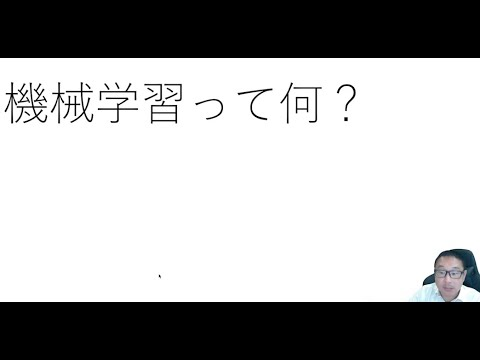

In [2]:
#こちらの動画を見てください
from IPython.display import YouTubeVideo
YouTubeVideo('gugq9ydf8b8', width=800, height=600)

機械学習による予測モデルを実際の医療現場で診断補助として運用するのであれば、「AIの予測はどの程度正しいのか？」を説明できることが重要。\
「機械学習」はコンピュータに物事を学習させることを総称した言葉であり、機械学習の具体的な手法(アルゴリズム)は以下のように多岐にわたります。

*   二値分類：\
データを2つのクラスに分類 → 陰性 or 陽性
*   回帰による二値分類：\
データの分布をグラフで表したとき、直線を使ってデータを二分(線型回帰)
*   多項式回帰による二値分類：\
多項式を使った曲線を使ってデータを二分
*   ロジスティック回帰による二値分類：\
回帰の手法では分類困難な場合。例えば、メールのスパムメールと通常メールの二分。このような場合は、「スパムである可能性は80%」のように、確率によるロジスティック回帰で分類
*   ニューラルネットワーク：\
動物の神経細胞を模した「人工ニューロン」を複数繋ぎ合わせることで分類する方法。ニューロンの連結数を増やし、人間の脳に近い学習を行わせる手法のことを「**深層学習(ディープラーニング)**」と呼ぶ。

---
## **混同行列、ROC曲線、AUC**

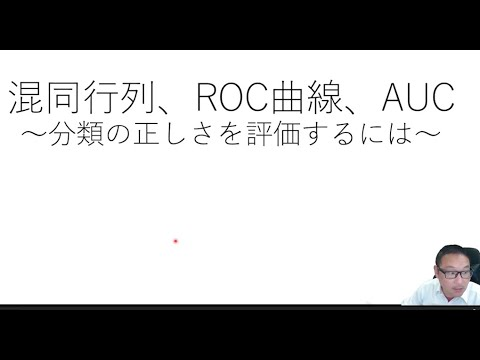

In [1]:
#こちらの動画を見てください
from IPython.display import YouTubeVideo
YouTubeVideo('opBZQOa8EZA', width=800, height=600)

予想の正しさを定量的に評価するにはどうすれば良いか？\
データを2つのクラス(陰性と陽性)に二値分類するが、
* 陰性と分類し本当に陰性であったもの (True Negative)
* 陽性と分類し本当に陽性であったもの (True Positive)

は、正しい分類である。一方、
* 陰性と分類し本当は陽性であったもの (False Positive)
* 陽性と分類し本当は陰性であったもの (False Negative)

は、誤った分類である。これら4成分を行列としたものを**混同行列**(Confusion Matrix)と言う。

$$
        \left[\begin{array}{c|cc}
            TP & FP\\
            \hline
            FN & TN\\
        \end{array}\right] \quad
$$

横軸をFPR(False Positive Rate)、縦軸をTPR(True Positive Rate)としたグラフを**ROC曲線**(Receiver Operating Characteristic曲線)という。\
ROC曲線の下側の面積比が**AUC**(Area Under the ROC Curve)である。\
AUCは0から1の値を取り、1に近いほど分類が正しいことを示す。

---
## **ViTとCNNで画像の二値分類**
レントゲン画像を男女に分類しよう。

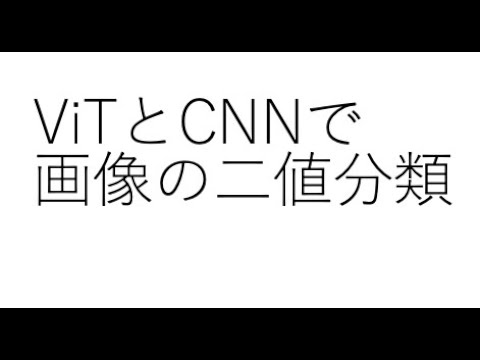

In [3]:
#こちらの動画を見てください
from IPython.display import YouTubeVideo
YouTubeVideo('3JxREAM9YL0', width=800, height=600)

In [ ]:
!pip install timm #モデルのインストール
# 必要なライブラリをインポート
from __future__ import print_function

import glob
import os
import random
import cv2
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import v2
from tqdm.notebook import tqdm

from pathlib import Path
import seaborn as sns
import timm
from pprint import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

GULMSの「画像データ」から[x-ray.zip](https://mdl.media.gunma-u.ac.jp/mod/resource/view.php?id=70103)をダウンロードし、Google Drive/My Drive/に置いてください。

In [3]:
from zipfile import ZipFile

# Zipファイルの解凍
file_name = '/content/drive/MyDrive/x-ray.zip'
with ZipFile(file_name) as zip:
    zip.extractall()

`/content/x-ray`のディレクトリができていることを確認してください。

In [ ]:
# データの読み込みを確認
files = glob.glob('/content/x-ray/*/*/*.png')
random_idx = np.random.randint(1, len(files), size=9)
fig, axes = plt.subplots(3, 3, figsize=(8, 6))

for idx, ax in enumerate(axes.ravel()):
    img = Image.open(files[idx])
    ax.imshow(img)

In [5]:
device = 'cuda'
train_dataset_dir = Path('/content/x-ray/train') #訓練データ
val_dataset_dir = Path('/content/x-ray/validation') #検証データ(訓練データでは良い精度で予想できるが、それ以外のデータでは、予測が当てにならない→過学習)
test_dataset_dir = Path('/content/x-ray/test') #テストデータ

In [6]:
# transformを使って、データセットの画像の前処理を行います。
#画像のサイズを224×224にリサイズ
#左右反転によるData Augmentation
#Tensor型へデータ変更
#正規化

train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

test_transforms = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

# データセット（画像とラベルのセット）を作成
train_data = datasets.ImageFolder(train_dataset_dir,train_transforms)
valid_data = datasets.ImageFolder(val_dataset_dir, val_transforms)
test_data = datasets.ImageFolder(test_dataset_dir, test_transforms)

# データをバッチに分ける。今回は、batch_sizeを16
train_loader = DataLoader(dataset = train_data, batch_size=16, shuffle=True )
valid_loader = DataLoader(dataset = valid_data, batch_size=16, shuffle=False)
test_loader = DataLoader(dataset = test_data, batch_size=16, shuffle=False)

「編集→ノートブックの設定→ハードウェアアクセラレータ→GPU」でGPUの処理に変更してください。

---
## ViTで画像分類

In [ ]:
# modelのリストを表示
model_names = timm.list_models(pretrained=True)
pprint(model_names)

In [ ]:
#今回は‘vit_base_patch16_224_in21k’を使用
model = timm.create_model('vit_base_patch16_224_in21k', pretrained=True, num_classes=2)
#model = timm.create_model('tf_efficientnetv2_s_in21ft1k', pretrained=True, num_classes=2)
model = model.to(device)

In [ ]:
# 学習条件
epochs = 100
lr = 0.001

#損失関数、活性化関数の設定
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# 学習ループの設定、実行
best_loss = None

# Accuracy計算用の関数
def calculate_accuracy(output, target):
    output = (torch.sigmoid(output) >= 0.5)
    target = (target == 1.0)
    accuracy = torch.true_divide((target == output).sum(dim=0), output.size(0)).item()
    return accuracy

train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for data, label in tqdm(train_loader):
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)

    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0
        for data, label in valid_loader:
            data = data.to(device)
            label = label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)

    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )

    train_acc_list.append(epoch_accuracy)
    val_acc_list.append(epoch_val_accuracy)
    train_loss_list.append(epoch_loss)
    val_loss_list.append(epoch_val_loss)

    if (best_loss is None) or (best_loss > val_loss):
        best_loss = val_loss
        model_path = '/content/drive/MyDrive/bestViTmodel.pth' #重みファイル名
        #model_path = '/content/drive/MyDrive/bestmodel_efficientnet.pth'
        torch.save(model.state_dict(), model_path)

    print()

In [ ]:
# テストデータによる検証
def evaluate_model(model, test_loader):
    model.load_state_dict(torch.load("/content/drive/MyDrive/bestViTmodel.pth")) #重みファイル名
    model.eval()
    predictions = []
    actuals = []
    probas = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            probas.extend(outputs[:, 1].cpu().numpy())  # 二番目のクラス（陽性クラス）の確率
            predictions.extend(predicted.cpu().numpy())
            actuals.extend(labels.cpu().numpy())


    # 指標の計算
    confusion = confusion_matrix(actuals, predictions)
    accuracy = accuracy_score(actuals, predictions)
    recall = recall_score(actuals, predictions)  # 感度
    specificity = recall_score(actuals, predictions, pos_label=0)
    precision = precision_score(actuals, predictions)  # PPV
    npv = precision_score(actuals, predictions, pos_label=0)  # NPV
    f1 = f1_score(actuals, predictions)
    auc = roc_auc_score(actuals, probas)


    #print("混同行列:\n", confusion)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"感度: {recall:.4f}")
    print(f"特異度: {specificity:.4f}")
    print(f"PPV: {precision:.4f}")
    print(f"NPV: {npv:.4f}")
    print(f"F-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")


    # Confusion matrixの描画
    # 混同行列の可視化
    plt.figure(figsize=(7, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()


    # ROC曲線の描画
    fpr, tpr, thresholds = roc_curve(actuals, probas)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


evaluate_model(model, test_loader)

---
## CNNで画像分類
* モデル名を`vit_base_patch16_224_in21k` → `tf_efficientnetv2_s_in21ft1k`
* 重みファイル名を`/content/drive/MyDrive/bestViTmodel.pth` → `/content/drive/MyDrive/bestmodel_efficientnet.pth`

に変更して、CNNにおける混同行列、ROC曲線、AUCを計算しなさい。


---
## レポート課題
上で求めたViTとCNNの分類の結果の違いについて200字程度で、以下に要約しなさい。